# The Steps involved in solving a problem in Deep Learning



1. Environment Setup: Import Necessary packages 
2. Loading of Input: Data importing and Exploration, Preprocessing
3. Split the data into two parts: "Training images and Testing images"
4. Building a Deep learningModel:Using appropriate algorithm,Train the model with training image, and saving the model with weights.
5. Model Evaluation: Getting Accuracy for the predicted model 
6. Finally observing the model with testing image to get final prediction.


### (1) Environment Setup

- **listdir**- To get the list of all files and directories in the specified 
- **time**- This function returns the number of seconds passed since epoch
- **cv2**- Loads an image from the specified file
- **tensorflow**- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.
- **shuffle**- The shuffle() method takes a sequence (list, string, or tuple and data) and reorganize the order of the items.
- **numpy**- ) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
- **matplotlib**- is a library creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
- **imutils**-  A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV 
- **sklearn.metrics**-  implements several loss, score, and utility functions to measure classification performance.
- **sklearn.model_selection**-  that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.
- **Keras**- is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow,Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible
- **tensorflow.keras.callbacks**- A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference, including reading/changing the Keras model.

In [33]:
import os
from os import listdir
import time
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
from zipfile import ZipFile
brain_data = '/content/gdrive/MyDrive/Brain MRI classes.zip'
with ZipFile(brain_data, 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [4]:
from zipfile import ZipFile
brain_data = '/content/gdrive/My Drive/Brain Tumor Data sets.zip'

with ZipFile(brain_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## Hidden Layers 
A hidden layers is nothing but number of hidden patterns associated between input(x) and output(y)
- **Zero Padding**=> symmetrically adding zeroes to the input matrix
- **Convolutional 2D**=> Calculates dot product of pixel value 
- **Batch Normalization**=> Improves performance, stability of CNN
- **Relu**=> An activation function in Neural Network
- **Maxpool**=> A Sample based  discretization  process for input data.
- **Flattern**=> Pooled features mapped into single column
- **Dense**=> To connect the pooled features into connected layer.

**About the Brain MRI Images dataset:**<br>
The dataset contains 2 type of class: yes and no which contains 253 Brain MRI Images of total. 
The folder yes contains 155 Brain MRI Images that are tumorous type. 
The folder no contains 98 Brain MRI Images that are non-tumorous type. 

Link below for the dataset
[Click here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection).

## (2) Loading of Input-Data importing, Exploration, Preprocessing

In [7]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)
#PIL- Python Image Library, it supports opening, manipulating and saving many different image file formats etc.

Pillow Version: 7.0.0


In [8]:
from PIL import Image
image = Image.open('Tumor dataset/no/4 no.jpg')
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(201, 250)


uint8
(200, 200, 3)


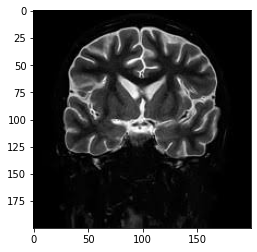

In [9]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('Tumor dataset/no/19 no.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

(360, 319)
JPEG
L
(319, 360)


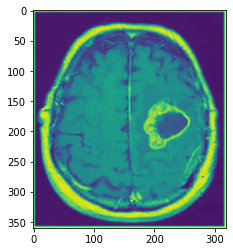

In [10]:
from PIL import Image
from numpy import asarray
image = Image.open('Tumor dataset/yes/Y10.jpg')
data = asarray(image)
print(data.shape)
print(image.format)
print(image.mode)
print(image.size)
pyplot.imshow(data)
pyplot.show()

In [11]:
#loading all the images in a directory
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('Tumor dataset/yes'):
    brain_tumor = image.imread('Tumor dataset/yes/' + filename)
    loaded_images.append(brain_tumor)
    print('>Loaded %s %s' %(filename, brain_tumor.shape))

>Loaded Y188.jpg (879, 766, 3)
>Loaded Y36.JPG (251, 204, 3)
>Loaded Y166.JPG (291, 253, 3)
>Loaded Y186.jpg (450, 355, 3)
>Loaded Y192.JPG (342, 273, 3)
>Loaded Y8.jpg (446, 450, 3)
>Loaded Y58.JPG (340, 314, 3)
>Loaded Y99.JPG (357, 283, 3)
>Loaded Y13.jpg (325, 254, 3)
>Loaded Y82.jpg (223, 226, 3)
>Loaded Y42.jpg (210, 200, 3)
>Loaded Y61.jpg (520, 433, 3)
>Loaded Y103.jpg (993, 825, 3)
>Loaded Y153.jpg (359, 300, 3)
>Loaded Y7.jpg (456, 374, 3)
>Loaded Y78.jpg (251, 201, 3)
>Loaded Y6.jpg (938, 911, 3)
>Loaded Y182.JPG (318, 273, 3)
>Loaded Y148.JPG (283, 231, 3)
>Loaded Y24.jpg (1024, 1024)
>Loaded Y154.jpg (431, 400, 3)
>Loaded Y41.jpg (1427, 1275)
>Loaded Y34.jpg (380, 310, 3)
>Loaded Y120.JPG (245, 224, 3)
>Loaded Y90.jpg (512, 512, 3)
>Loaded Y256.JPG (352, 281, 3)
>Loaded Y158.JPG (334, 283, 3)
>Loaded Y113.JPG (312, 254, 3)
>Loaded Y101.jpg (336, 300)
>Loaded Y259.JPG (324, 278, 3)
>Loaded Y168.jpg (300, 263, 3)
>Loaded Y116.JPG (269, 249, 3)
>Loaded Y255.JPG (295, 283, 3)


In [12]:
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('Tumor dataset/no'):
    non_tumor = image.imread('Tumor dataset/no/' + filename)
    loaded_images.append(non_tumor)
    print('>Loaded %s %s' %(filename, non_tumor.shape))

>Loaded N17.jpg (393, 350, 3)
>Loaded 15 no.jpg (217, 232, 3)
>Loaded 18 no.jpg (221, 228, 3)
>Loaded 4 no.jpg (250, 201, 3)
>Loaded No14.jpg (340, 339, 3)
>Loaded N19.JPG (282, 230, 3)
>Loaded 19 no.jpg (200, 200, 3)
>Loaded no 91.jpeg (442, 400, 3)
>Loaded 10 no.jpg (201, 173, 3)
>Loaded 2 no.jpeg (630, 630, 3)
>Loaded no 10.jpg (750, 750)
>Loaded no 4.jpg (275, 220)
>Loaded No19.jpg (680, 680, 3)
>Loaded 30 no.jpg (242, 208, 3)
>Loaded 43 no.jpg (194, 259, 3)
>Loaded 27 no.jpg (231, 218, 3)
>Loaded 9 no.jpg (201, 173, 3)
>Loaded no 97.jpg (442, 442, 3)
>Loaded no 1.jpg (225, 225, 3)
>Loaded N21.jpg (1024, 1024)
>Loaded No16.jpg (200, 300, 3)
>Loaded 17 no.jpg (231, 218, 3)
>Loaded no.jpg (512, 512, 4)
>Loaded 25 no.jpg (217, 232, 3)
>Loaded 11 no.jpg (168, 300, 3)
>Loaded no 923.jpg (225, 225, 3)
>Loaded no 7.jpeg (630, 630, 3)
>Loaded no 5.jpeg (442, 442)
>Loaded 23 no.jpg (242, 208, 3)
>Loaded no 92.jpg (244, 206, 3)
>Loaded 35 no.jpg (225, 225, 3)
>Loaded N6.jpg (257, 196, 3)
>Lo

## Saving image into another format

In [13]:
from PIL import Image
image = Image.open('Tumor dataset/yes/Y108.jpg')
image.save('Tumor dataset/yes/Y108.png',format='PNG')
up_format = Image.open('Tumor dataset/yes/Y108.png')
print(up_format.format)

PNG


In [15]:
#gray scale version of loaded image
from PIL import Image
image = Image.open('Tumor dataset/yes/Y108.jpg')
gray_image = image.convert(mode= 'L')
gray_image.save('Tumor dataset/yes/Y108.jpg')
_image = Image.open('Tumor dataset/yes/Y108.jpg')
_image.show()

In [16]:
#resize of image
rs_size = Image.open('Tumor dataset/yes/Y108.jpg')
image.thumbnail((50,20))
print(image.size)

(18, 20)


In [17]:
def brain_crop(image, plot=False): #we have some content if plot=true then we cant call content function
   
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

#cropping of sample image of tumor-type

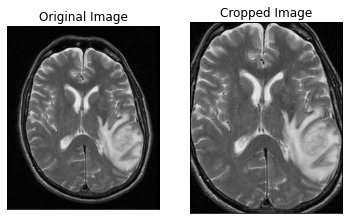

In [18]:
cp_img = cv2.imread('Tumor dataset/yes/Y61.jpg')
cp_new_img = brain_crop(cp_img,True)

#cropping of sample image of non tumor type

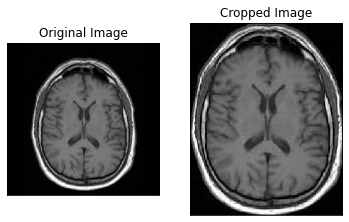

In [19]:
cp_img = cv2.imread('Tumor dataset/no/40 no.jpg')
cp_new_img = brain_crop(cp_img,True)

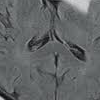

In [20]:
#cropping a portion of image as segment
image = Image.open('Tumor dataset/yes/Y81.jpg')

cropped = image.crop((50,100,150,200))
cropped

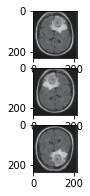

In [21]:
#Flipping of tumor data
flip_image = Image.open('Tumor dataset/yes/Y120.JPG')
#horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

pyplot.subplot(411)
pyplot.imshow(image)

pyplot.subplot(412)
pyplot.imshow(hoz_flip)

pyplot.subplot(413)
pyplot.imshow(ver_flip)


In [24]:
classes = os.listdir('/content/Brain Tumor Data sets/Training')

In [27]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [28]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "/content/Brain Tumor Data sets/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

glioma_tumor
glioma_tumor
no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
(2870, 150, 150, 3)
(2870, 4)


In [29]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "/content/Brain Tumor Data sets/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

glioma_tumor
glioma_tumor
no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
(394, 150, 150, 3)
(394, 4)


In [34]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [36]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))

Epoch 1/19
90/90 [==============================] - 60s 664ms/step - loss: 0.4453 - accuracy: 0.7721 - val_loss: 1.3469 - val_accuracy: 0.4645
Epoch 2/19
90/90 [==============================] - 60s 663ms/step - loss: 0.4321 - accuracy: 0.7878 - val_loss: 1.4060 - val_accuracy: 0.4949
Epoch 3/19
90/90 [==============================] - 60s 663ms/step - loss: 0.4079 - accuracy: 0.7955 - val_loss: 1.2871 - val_accuracy: 0.4822
Epoch 4/19
90/90 [==============================] - 60s 663ms/step - loss: 0.3582 - accuracy: 0.8268 - val_loss: 1.4705 - val_accuracy: 0.5025
Epoch 5/19
90/90 [==============================] - 60s 662ms/step - loss: 0.3787 - accuracy: 0.8171 - val_loss: 1.1733 - val_accuracy: 0.5102
Epoch 6/19
90/90 [==============================] - 60s 666ms/step - loss: 0.3605 - accuracy: 0.8272 - val_loss: 1.7851 - val_accuracy: 0.5000
Epoch 7/19
90/90 [==============================] - 60s 666ms/step - loss: 0.3626 - accuracy: 0.8307 - val_loss: 1.7597 - val_accuracy: 0.4898

In [37]:
model.save("brain-tumor-model.h5")

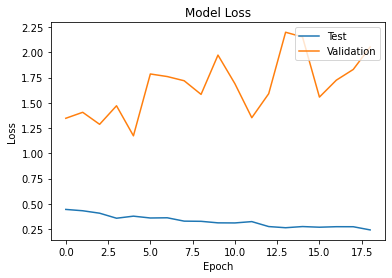

In [38]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

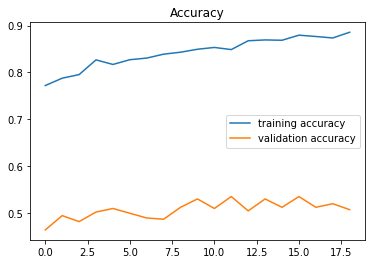

In [39]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [41]:
loss, acc = model.evaluate(testData, testLabel)
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

13/13 [==============================] - 2s 172ms/step - loss: 2.0521 - accuracy: 0.5076
Test Loss = 2.0520782470703125
Test Accuracy = 0.5076141953468323
